In [2]:
%pip install librosa==0.9.2 matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 9.0 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b5/24/aaccf324ce862bb82277e8814d2aebbb2a2c160d04e95aa2b8c9dc3137a9/matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 9.3 MB/s eta 0:00:00
  Obtai

In [3]:
%pip install matplotlib==3.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

import cupy as cp 
import numpy as np

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython
from IPython.display import Audio



### Data paths

In [5]:
Ravdess = "data_sources/RAVDESS/audio_speech_actors_01-24/"
Crema = "data_sources/CREMA-D/AudioWAV/"
Tess = "data_sources/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "data_sources/SAVEE/ALL/"

### RAVDESS DataFrame

In [6]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.

# Define a mapping dictionary
emotion_mapping = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}

# Use the map function to replace the integers with emotions
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map(emotion_mapping)

Ravdess_df.head()


Emotions                                               Path
0  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
1  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
2  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
3  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
4     calm  data_sources/RAVDESS/audio_speech_actors_01-24...

### CREMA DataFrame

In [7]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  data_sources/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1  disgust  data_sources/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2     fear  data_sources/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3    happy  data_sources/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4  neutral  data_sources/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav

### TESS DataFrame

In [8]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()


Emotions                                               Path
0    angry  data_sources/TESS/TESS Toronto emotional speec...
1    angry  data_sources/TESS/TESS Toronto emotional speec...
2    angry  data_sources/TESS/TESS Toronto emotional speec...
3    angry  data_sources/TESS/TESS Toronto emotional speec...
4    angry  data_sources/TESS/TESS Toronto emotional speec...

### SAVEE DataFrame

In [9]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                               Path
0    angry  data_sources/SAVEE/ALL/DC_a01.wav
1    angry  data_sources/SAVEE/ALL/DC_a02.wav
2    angry  data_sources/SAVEE/ALL/DC_a03.wav
3    angry  data_sources/SAVEE/ALL/DC_a04.wav
4    angry  data_sources/SAVEE/ALL/DC_a05.wav

### Creating dataframe using 4 dataframes

In [10]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
1  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
2  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
3  neutral  data_sources/RAVDESS/audio_speech_actors_01-24...
4     calm  data_sources/RAVDESS/audio_speech_actors_01-24...

### Data Visualization

/tmp/ipykernel_423/1587280586.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_path['Emotions'].value_counts().index, y=data_path['Emotions'].value_counts(), palette=unique_colors)


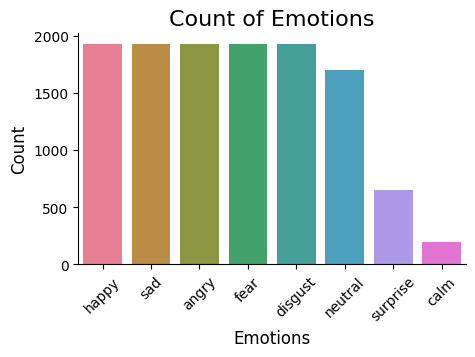

In [11]:
unique_colors = sns.color_palette("husl", n_colors=len(data_path['Emotions'].unique()))

plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

# Create a vertical bar graph with unique colors
sns.barplot(x=data_path['Emotions'].value_counts().index, y=data_path['Emotions'].value_counts(), palette=unique_colors)

plt.title('Count of Emotions', size=16)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Functions for Waveplot and Spectrogram

In [12]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveform for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Time (s)', size=12)
    plt.ylabel('Amplitude', size=12)
    plt.show()

def create_spectrogram(data, sr, e):
    # Compute the Short-Time Fourier Transform (STFT)
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log', cmap='viridis')   
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)', size=12)
    plt.ylabel('Frequency (Hz)', size=12)
    plt.show()


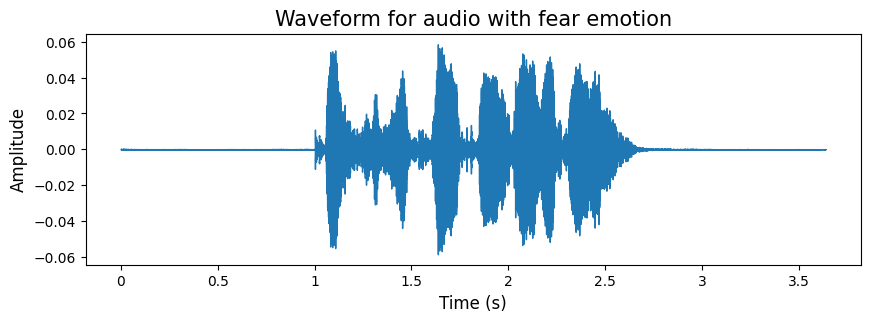

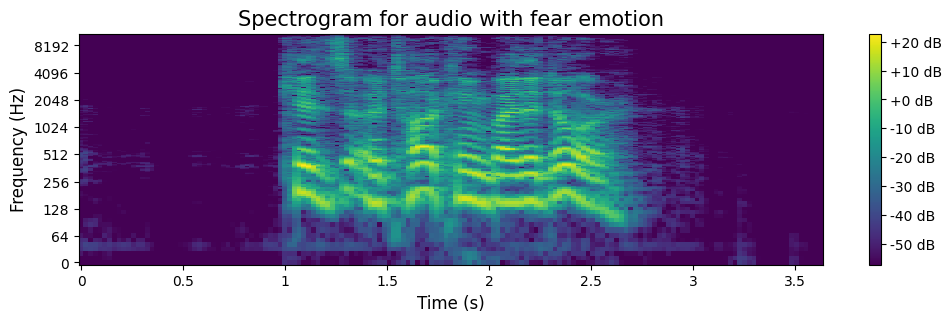

In [13]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

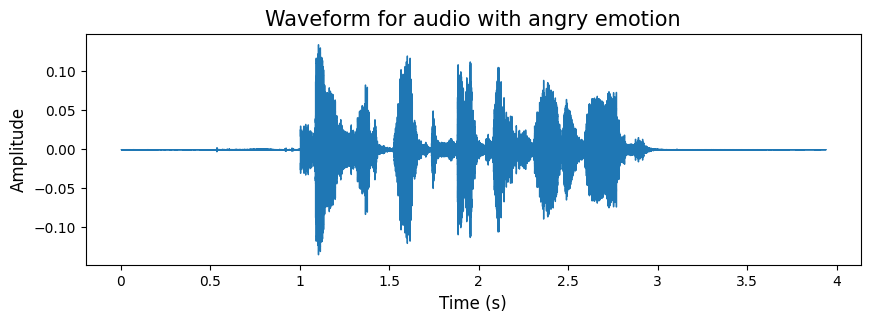

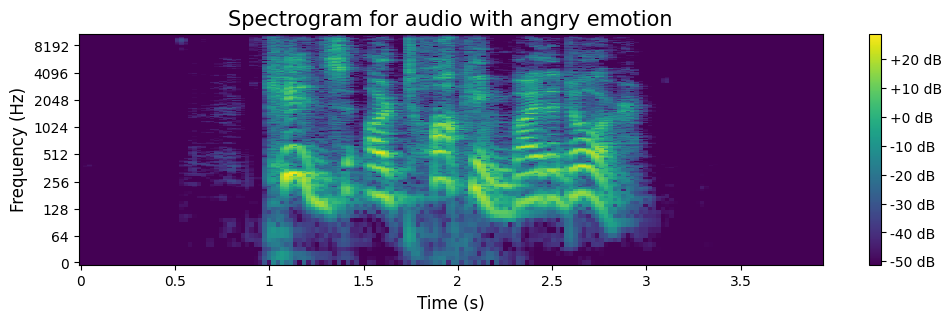

In [14]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

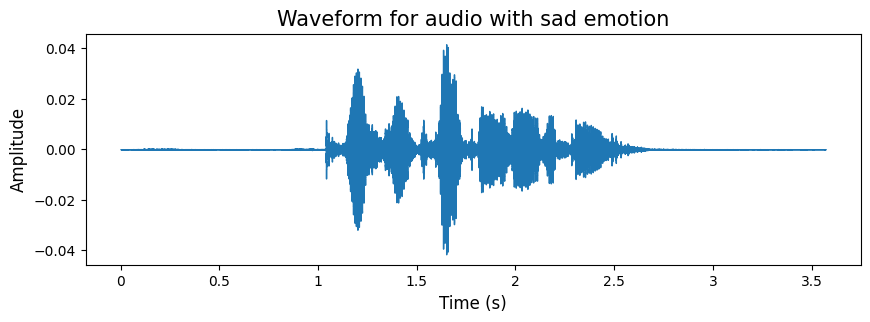

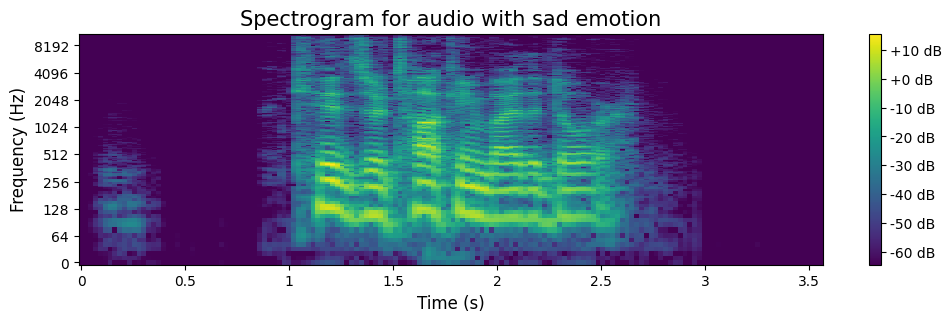

In [15]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

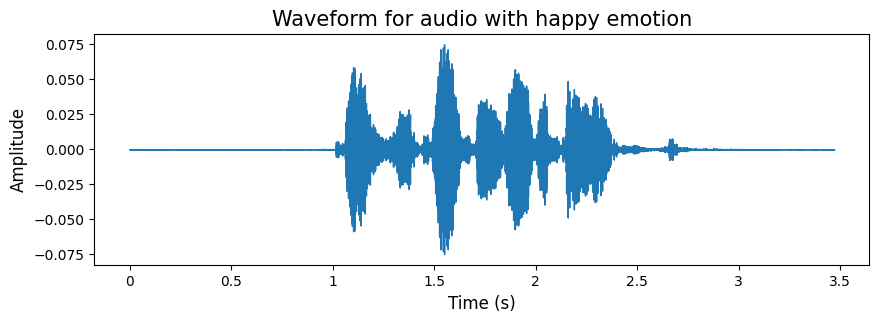

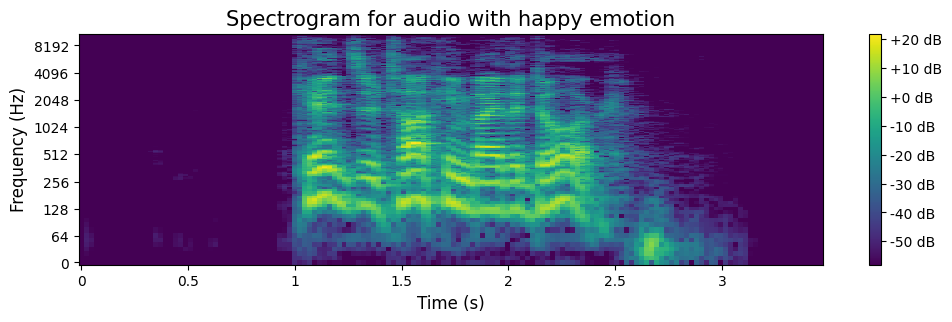

In [16]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Data Augmentation
Data augmentation is the process by which we create new synthetic data samples<br>
by adding small perturbations on our initial training set.<br>
To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.<br>
The objective is to make our model invariant to those <br>
perturbations and enhace its ability to generalize.<br>
In order to this to work adding the perturbations must <br>
conserve the same label as the original training sample.

In [17]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

Taking any exapmles and checking for techniques<br>
We chose to add noise, stretching(changing speed) and pitching

In [18]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

1) Simple Audio

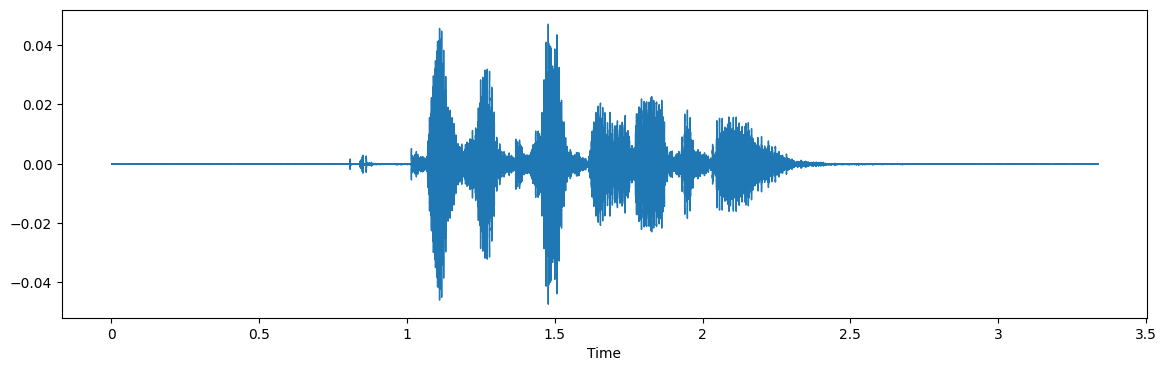

In [19]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

2) Noise Injection

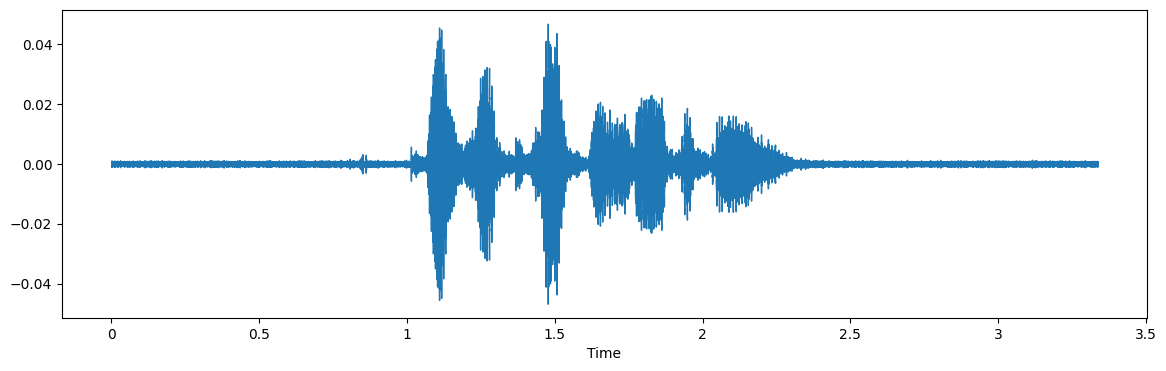

In [20]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

3) Stretching

/tmp/ipykernel_423/4130844094.py:7: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


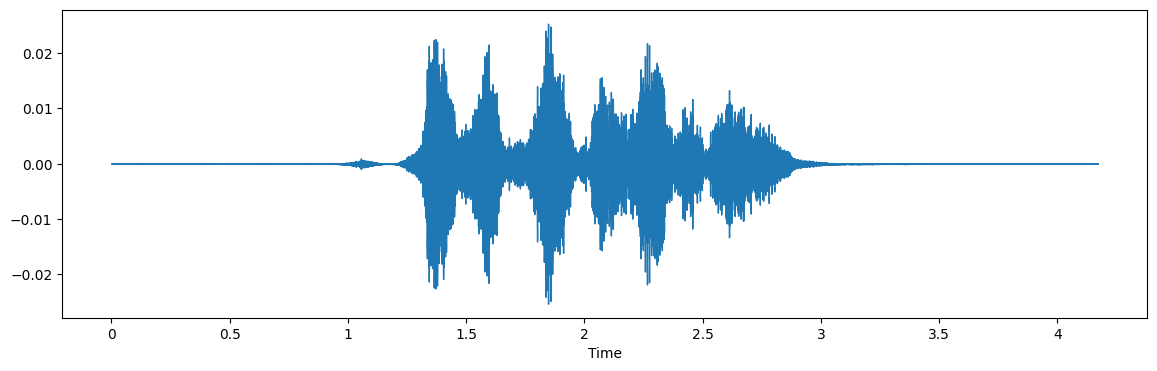

In [21]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

4) Shifting

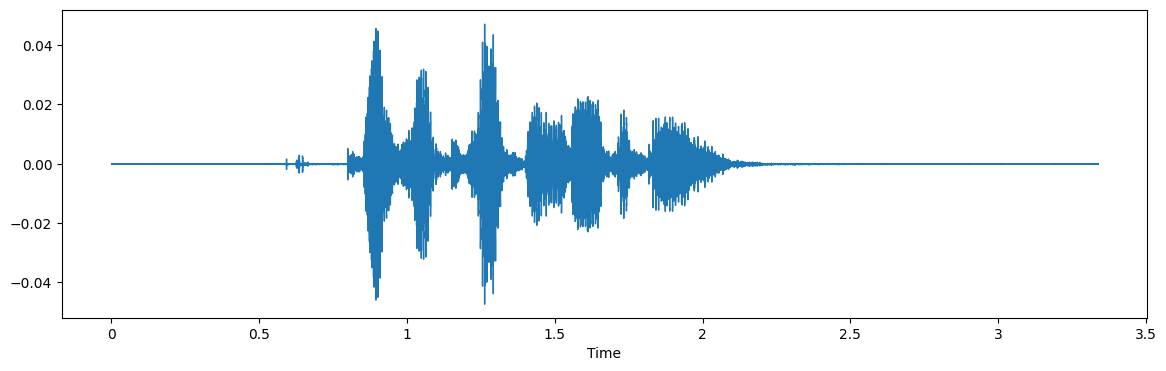

In [22]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

5) Pitch

/tmp/ipykernel_423/4130844094.py:14: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


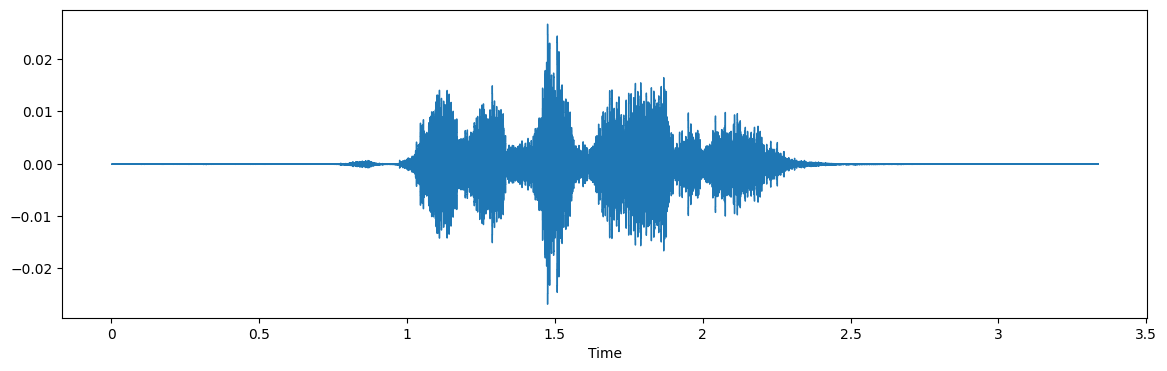

In [23]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Feature Extraction 
1) Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.
2) Chroma_stft: short for Chroma Short-Time Fourier Transform, is a feature extraction technique commonly used in the field of music signal processing and audio analysis.
3) MFCC: Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
4) Root mean square (RMS): A common feature extracted from time-domain signals, and it is used to characterize the amplitude or energy of a signal.
5) Mel spectrogram: A representation of an audio signal's frequency content over time, where the frequencies are converted to a perceptually meaningful scale known as the Mel scale.<br>
<b>Feautures are stacked horizontally while augmentations are stacked vertically.</b>


In [24]:
"""def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the 
    # ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result"""

'def extract_features(data):\n    # ZCR\n    result = np.array([])\n    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)\n    result=np.hstack((result, zcr)) # stacking horizontally\n\n    # Chroma_stft\n    stft = np.abs(librosa.stft(data))\n    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)\n    result = np.hstack((result, chroma_stft)) # stacking horizontally\n\n    # MFCC\n    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)\n    result = np.hstack((result, mfcc)) # stacking horizontally\n\n    # Root Mean Square Value\n    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)\n    result = np.hstack((result, rms)) # stacking horizontally\n\n    # MelSpectogram\n    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)\n    result = np.hstack((result, mel)) # stacking horizontally\n    \n    return result\n\ndef get_features(path):\n    # duration and offset are used to take care

In [71]:
import tensorflow as tf

# Function to extract features using TensorFlow
def extract_features(data, sample_rate):
    # ZCR
    zcr = tf.reduce_mean(tf.transpose(librosa.feature.zero_crossing_rate(y=data), (1, 0)), axis=1)

    # Chroma_stft
    stft = tf.abs(librosa.stft(data))
    chroma_stft = tf.reduce_mean(tf.transpose(librosa.feature.chroma_stft(S=stft, sr=sample_rate), (1, 0)), axis=1)

    # MFCC
    mfcc = tf.reduce_mean(tf.transpose(librosa.feature.mfcc(y=data, sr=sample_rate), (1, 0)), axis=1)

    # Root Mean Square Value
    rms = tf.reduce_mean(tf.transpose(librosa.feature.rms(y=data), (1, 0)), axis=1)

    # MelSpectrogram
    mel = tf.reduce_mean(tf.transpose(librosa.feature.melspectrogram(y=data, sr=sample_rate), (1, 0)), axis=1)
    
    return tf.concat([zcr, chroma_stft, mfcc, rms, mel], axis=0)

# Function to get features using TensorFlow
def get_feature(path):
    # duration and offset are used to take care of the no audio in the start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6, dtype=np.float64)

    # Without augmentation
    res1 = extract_features(data, sample_rate)

    # Data with noise
    noise_data = noise(data)  # You need to define the 'noise' function
    res2 = extract_features(noise_data, sample_rate)

    # Data with stretching and pitching
    new_data = stretch(data)  # You need to define the 'stretch' function
    data_stretch_pitch = pitch(new_data, sample_rate)  # You need to define the 'pitch' function
    res3 = extract_features(data_stretch_pitch, sample_rate)

    # Combine the results vertically
    result = tf.concat([res1, res2, res3], axis=0)
    
    return result


Appending emotion 3 times as we have made 3 augmentation techniques on each audio file.

In [82]:
# Set GPU device configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to prevent memory allocation at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

# Continue with the rest of your code
X, Y = [], []

for path, emotion in zip(data_path['Path'], data_path['Emotions']):
    feature = get_feature(path)  # Assuming get_feature returns a TensorFlow tensor
    X.append(feature)
    Y.append(emotion)

# No need to convert lists to NumPy arrays
# Convert lists to TensorFlow tensors
X = tf.convert_to_tensor(X, dtype=tf.float32)
Y = tf.convert_to_tensor(Y, dtype=tf.float32)

# Create TensorFlow datasets
X_dataset = tf.data.Dataset.from_tensor_slices(X)
Y_dataset = tf.data.Dataset.from_tensor_slices(Y)

# Combine X and Y datasets
dataset = tf.data.Dataset.zip((X_dataset, Y_dataset))


Physical devices cannot be modified after being initialized


/tmp/ipykernel_423/4130844094.py:7: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
/tmp/ipykernel_423/4130844094.py:14: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
/tmp/ipykernel_423/4130844094.py:7: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
/tmp/ipykernel_423/4130844094.py:14: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


KeyboardInterrupt: 